# Iris Species Classification  
This notebook performs data analysis and machine learning classification on the Iris dataset using various algorithms.

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Data Preparation**

In [2]:
# Load the iris dataset  
iris = sns.load_dataset('iris')  

# Display the first 10 rows  
print(iris.head(10))  

# Info and stats  
iris.info()  
iris.describe()  
print(iris.isnull().sum())  
print(iris.duplicated().sum())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  1

>**Exploratory Data Analysis (EDA)**

In [16]:
# Summary of the dataset
print(iris['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


**Data Visulaization**

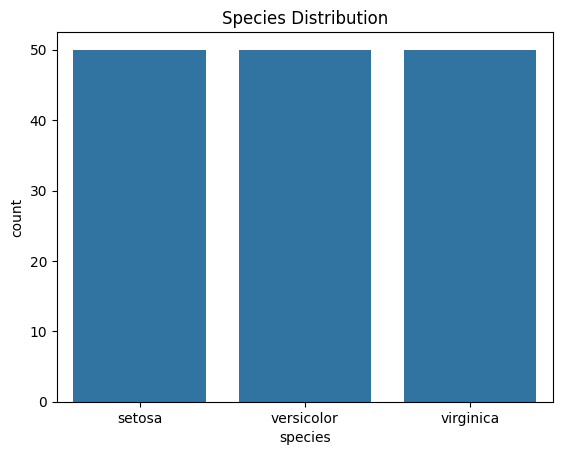

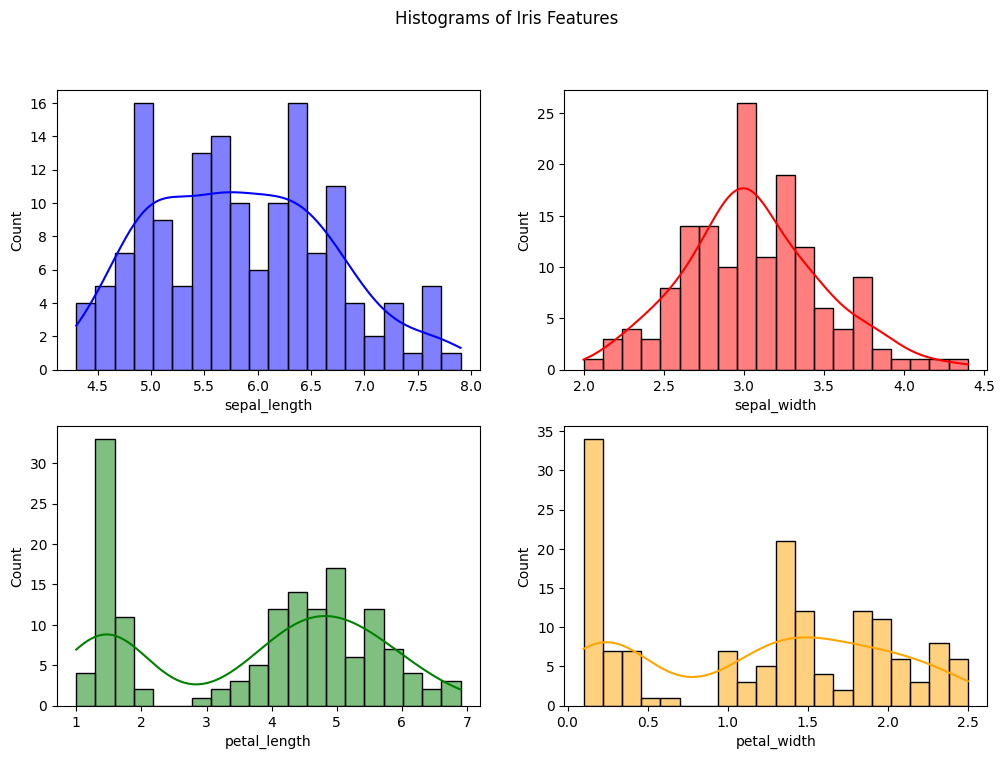

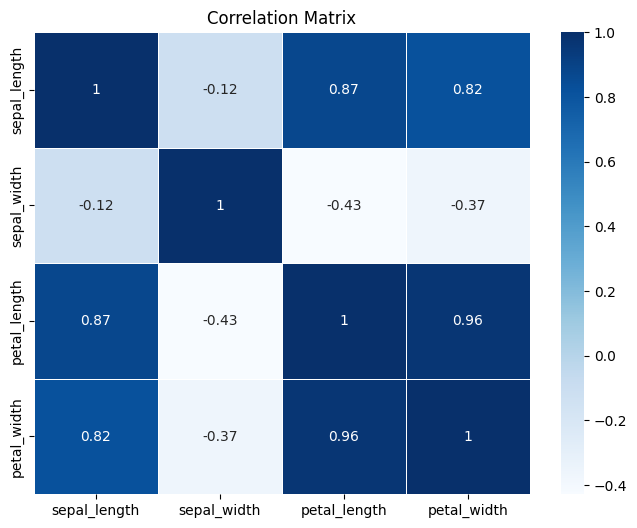

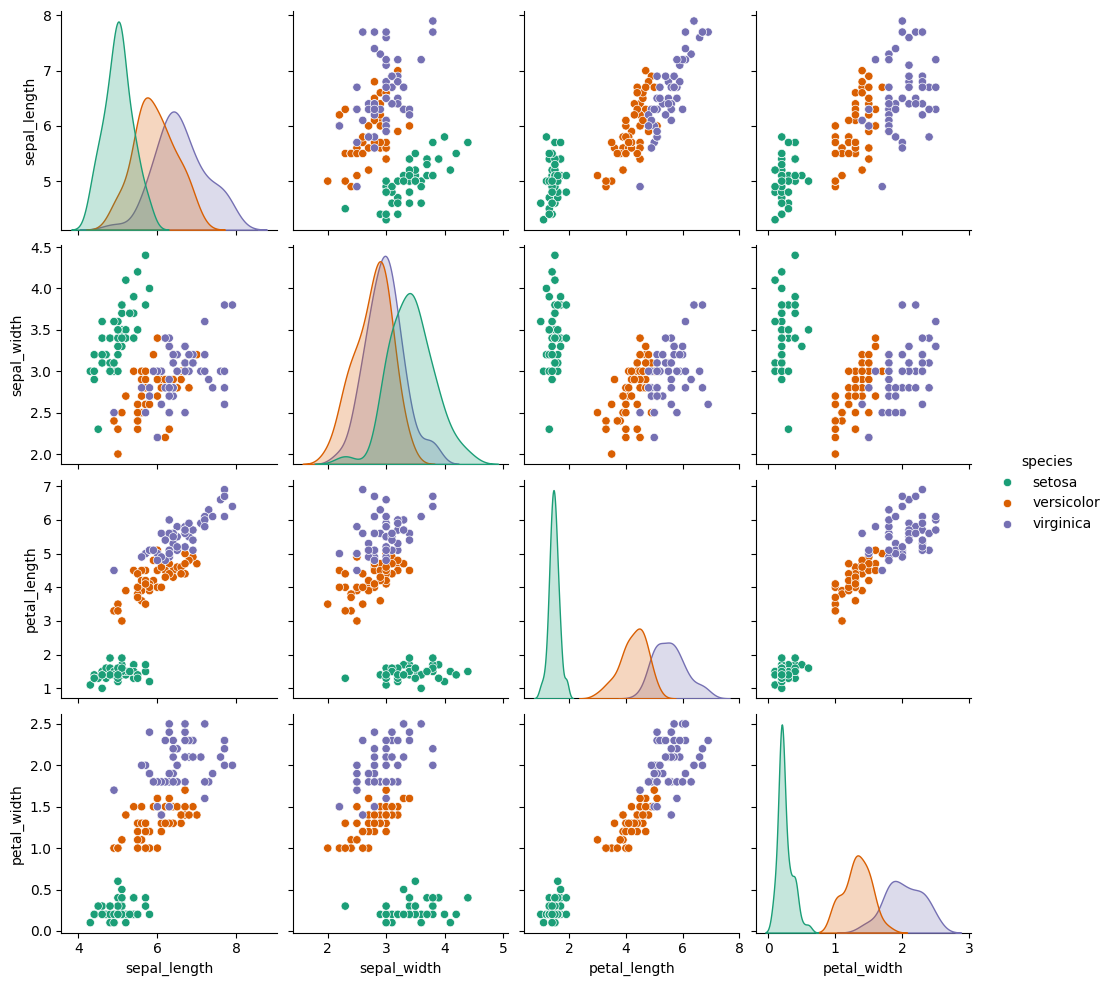

In [3]:
# Count plot of species distribution  
sns.countplot(data=iris, x='species')  
plt.title('Species Distribution')  
plt.show()  

# Histograms with KDE  
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
sns.histplot(iris['sepal_length'], bins=20, ax=axes[0, 0], color='blue', kde=True)  
sns.histplot(iris['sepal_width'], bins=20, ax=axes[0, 1], color='red', kde=True)  
sns.histplot(iris['petal_length'], bins=20, ax=axes[1, 0], color='green', kde=True)  
sns.histplot(iris['petal_width'], bins=20, ax=axes[1, 1], color='orange', kde=True)  
plt.suptitle('Histograms of Iris Features')  
plt.show()  

# Correlation Matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(iris.drop(columns='species').corr(), annot=True, cmap='Blues', linewidths=0.5)  
plt.title("Correlation Matrix")  
plt.show()  

# Pairplot  
sns.pairplot(iris, hue='species', diag_kind='kde', palette='Dark2')  
plt.show()

**Label Encoding**

In [4]:
le = LabelEncoder()  
iris['species'] = le.fit_transform(iris['species'])  
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [5]:
# Define feature and target variables  
X = iris.drop('species', axis=1)  
y = iris['species']  

# Split dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



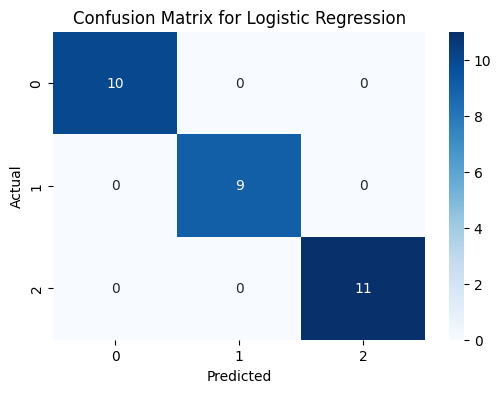

In [6]:
lr_model = LogisticRegression(max_iter=200)  
lr_model.fit(X_train, y_train)  
y_pred_lr = lr_model.predict(X_test)  

lr_accuracy = accuracy_score(y_test, y_pred_lr)  
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")  
print(classification_report(y_test, y_pred_lr))  

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", fmt=".0f")  
plt.title('Confusion Matrix for Logistic Regression')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

**KNN with GridSearch**


Best K for KNN: 3
KNN Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



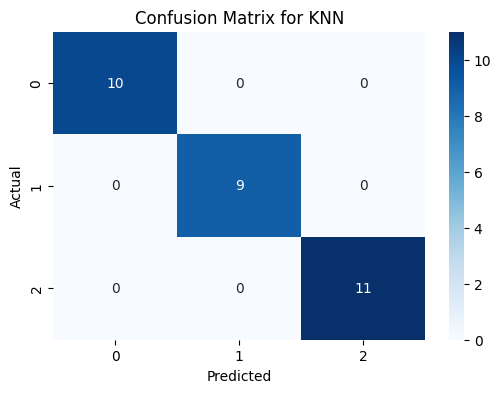

In [7]:
knn_params = {'n_neighbors': list(range(1, 11))}  
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)  
knn_model.fit(X_train, y_train)  

print(f"Best K for KNN: {knn_model.best_params_['n_neighbors']}")  

y_pred_knn = knn_model.predict(X_test)  

knn_accuracy = accuracy_score(y_test, y_pred_knn)  
print(f"KNN Accuracy: {knn_accuracy:.4f}")  
print(classification_report(y_test, y_pred_knn))  

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues", fmt=".0f")  
plt.title('Confusion Matrix for KNN')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

**SVM with GridSearch**

Best Parameters for SVM: {'C': 1, 'kernel': 'linear'}
SVM Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



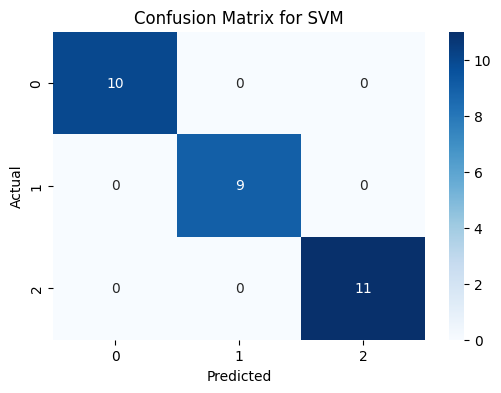

In [8]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  
svm_model = GridSearchCV(SVC(), svm_params, cv=5)  
svm_model.fit(X_train, y_train)  

print(f"Best Parameters for SVM: {svm_model.best_params_}")  

y_pred_svm = svm_model.predict(X_test)  

svm_accuracy = accuracy_score(y_test, y_pred_svm)  
print(f"SVM Accuracy: {svm_accuracy:.4f}")  
print(classification_report(y_test, y_pred_svm))  

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Blues", fmt=".0f")  
plt.title('Confusion Matrix for SVM')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

**Decision Tree Classifier**

Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



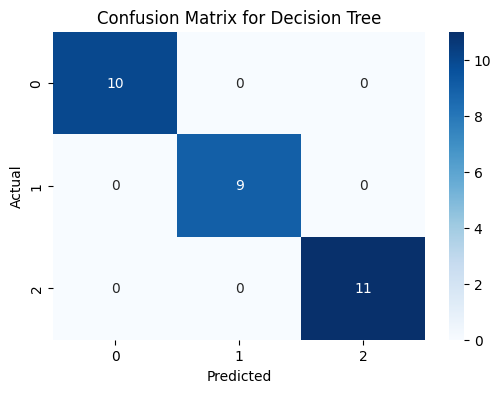

In [9]:
dt_model = DecisionTreeClassifier(random_state=42)  
dt_model.fit(X_train, y_train)  

y_pred_dt = dt_model.predict(X_test)  

dt_accuracy = accuracy_score(y_test, y_pred_dt)  
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")  
print(classification_report(y_test, y_pred_dt))  

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", fmt=".0f")  
plt.title('Confusion Matrix for Decision Tree')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

**Random Forest Classifier**


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



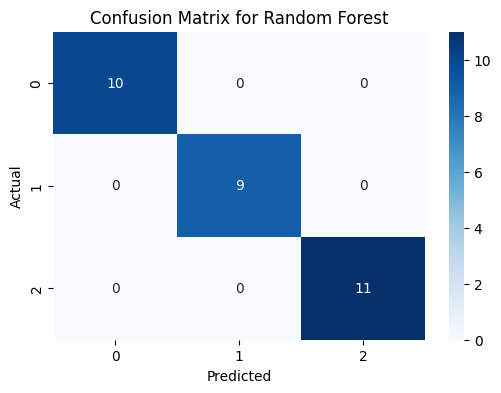

In [10]:
rf_model = RandomForestClassifier(random_state=42)  
rf_model.fit(X_train, y_train)  

y_pred_rf = rf_model.predict(X_test)  

rf_accuracy = accuracy_score(y_test, y_pred_rf)  
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")  
print(classification_report(y_test, y_pred_rf))  

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt=".0f")  
plt.title('Confusion Matrix for Random Forest')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()

**Model Comparison** 


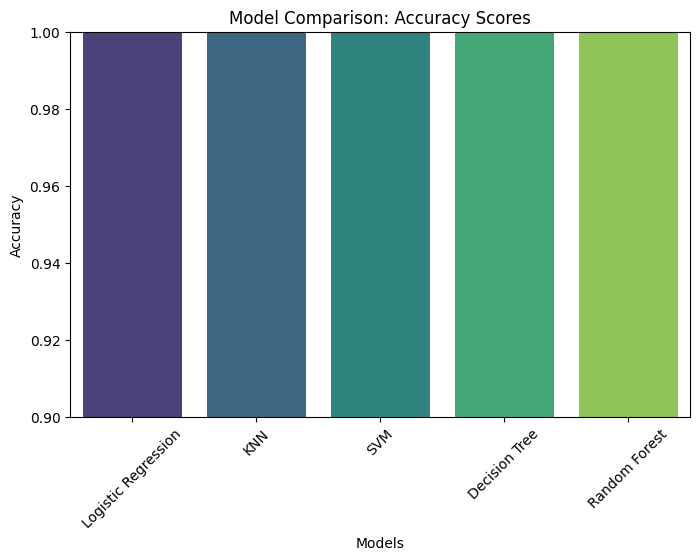

In [14]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']  
accuracies = [lr_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy]  

plt.figure(figsize=(8, 5))  
sns.barplot(x=models, y=accuracies, palette="viridis")  
plt.title('Model Comparison: Accuracy Scores')  
plt.xlabel('Models')  
plt.ylabel('Accuracy')  
plt.ylim(0.9, 1.0)  
plt.xticks(rotation=45)  
plt.show()